# Pre-Test Use Case : Churn
Author : Shelby Marsa Istiqomah
<br> Date   : 31 October 2019 

In [20]:
# 1.Memanggil Library

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 2.Read Dataset

df = pd.read_csv("churn.csv",encoding='latin1')

In [22]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [23]:
print(df.columns)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')


In [24]:
df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [25]:
df.shape

(5000, 21)

In [26]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64

### INSIGHT 1 : Jumlah customer churn vs stay

In [27]:
df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [54]:
count_stay = (df['class'] == 0).sum()
print("Jumlah customer yang stay:",count_stay)
count_churn = (df['class']== 1).sum()
print("Jumlah customer yang churn:",count_churn)

Jumlah customer yang stay: 4293
Jumlah customer yang churn: 707


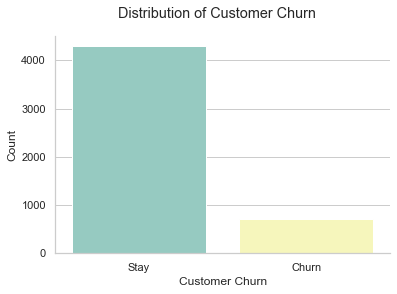

In [55]:
from matplotlib.pyplot import suptitle
from seaborn import despine

sns.set(style="whitegrid")

ax=sns.countplot(x='class',palette="Set3", data=df)
ax.set_xticklabels(["Stay","Churn"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

### INSIGHT 2 : Distribusi jumlah customer churn dan stay per state dan area

In [37]:
#Visualisasikan
def diff_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

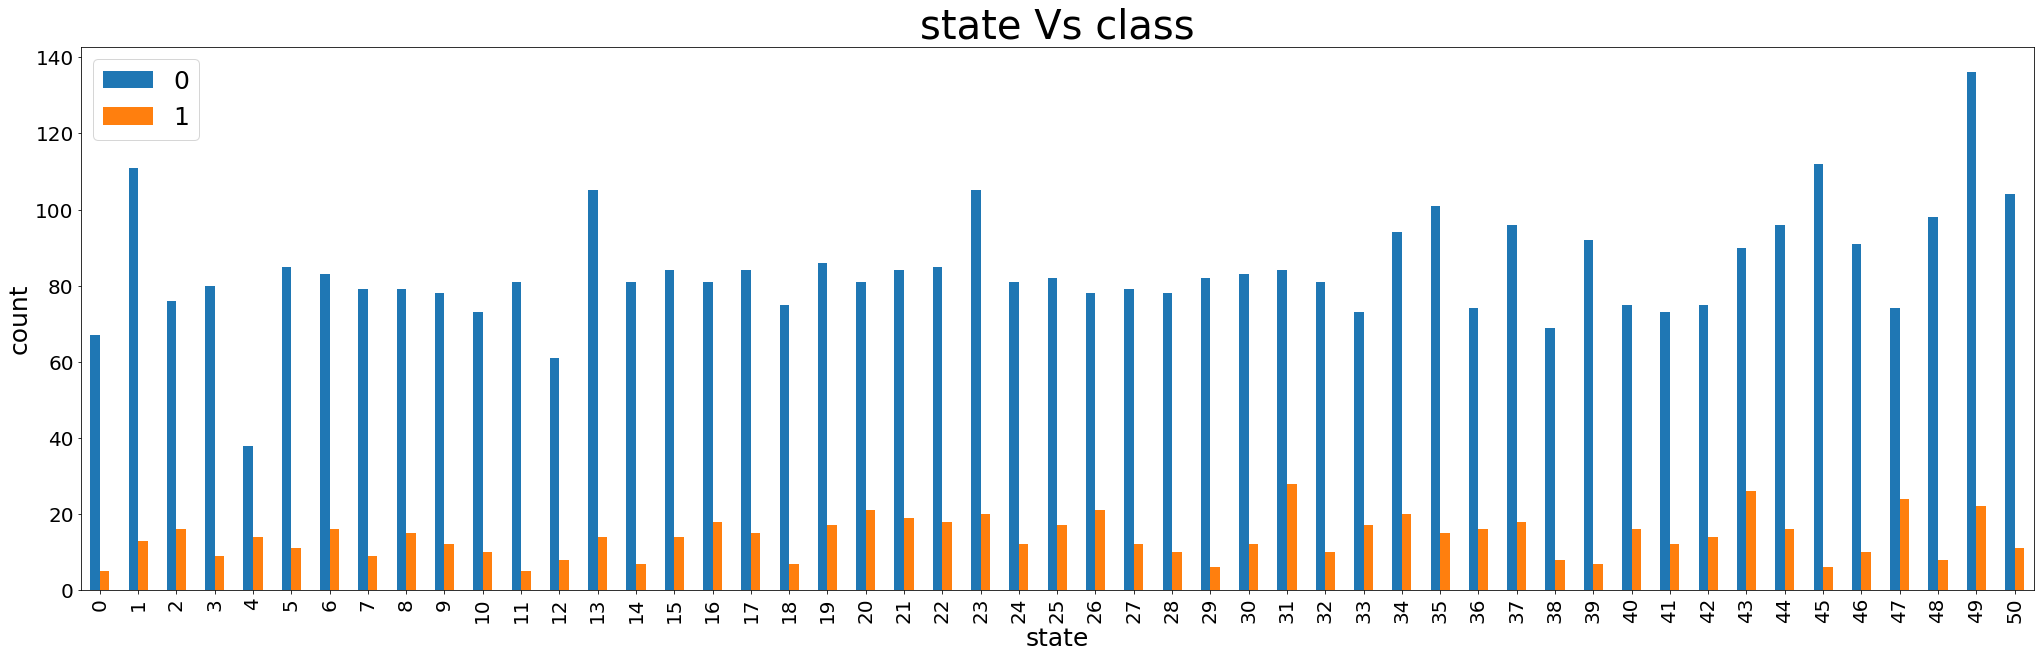

In [38]:
diff_bar('state','class')

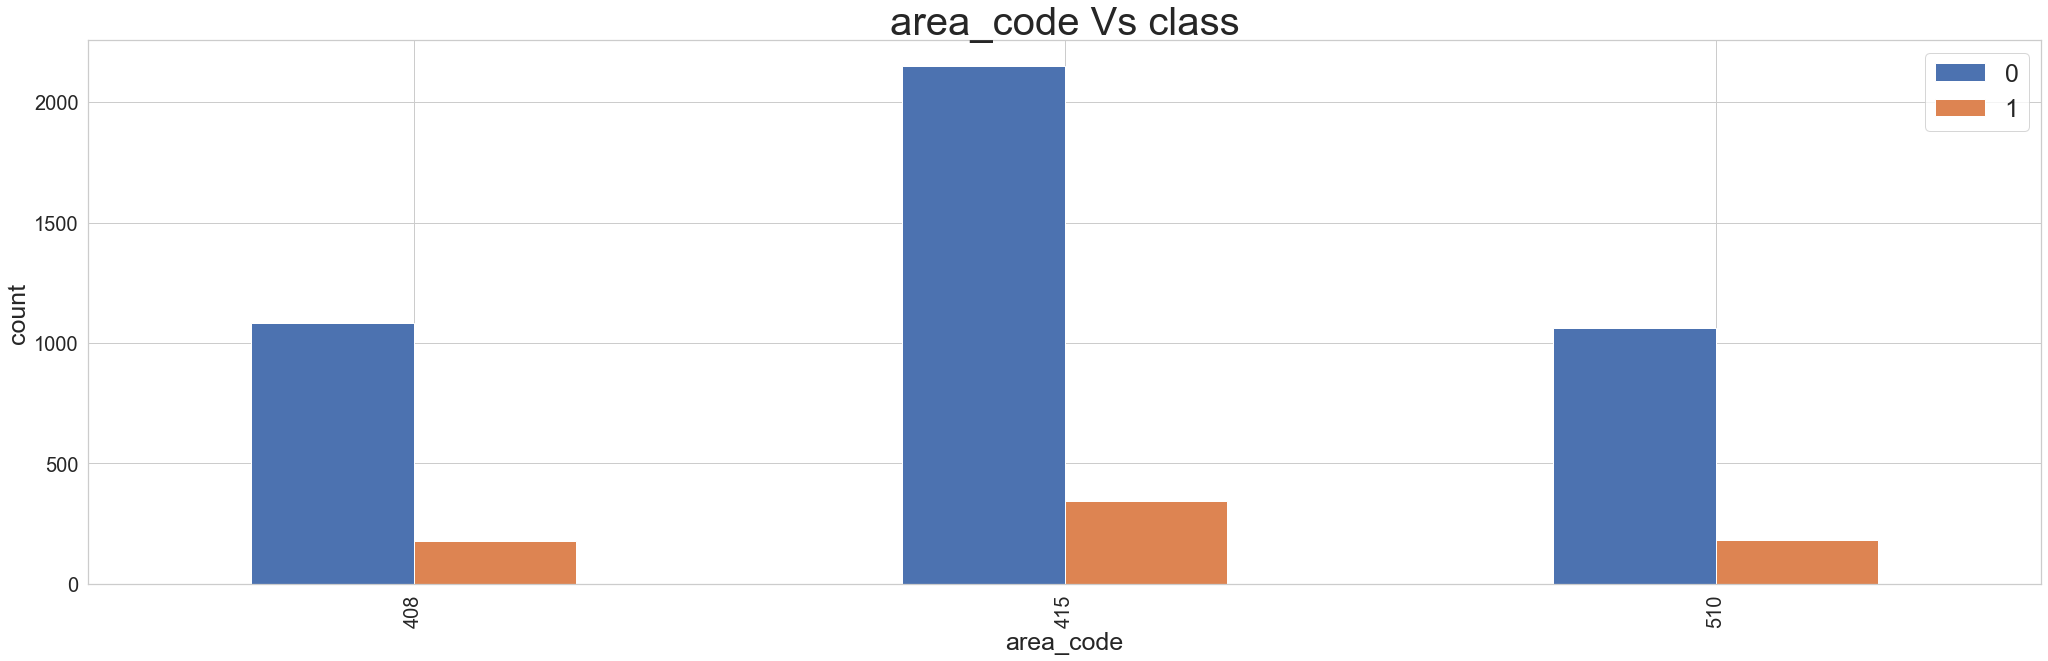

Area dengan jumlah churn terbanyak adalah area code 415


In [53]:
diff_bar('area_code','class')
print('Area dengan jumlah churn terbanyak adalah area code 415')

### INSIGHT 3 : Summary Statistics

In [63]:
num_set = df.describe().transpose()
num_set

,count,mean,std,min,25%,50%,75%,max
state,5000.0,25.998400,14.803480,0.0,13.000,26.00,39.00,50.00
account_length,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
area_code,5000.0,436.911400,42.209182,408.0,408.000,415.00,415.00,510.00
phone_number,5000.0,2499.500000,1443.520003,0.0,1249.750,2499.50,3749.25,4999.00
international_plan,5000.0,0.094600,0.292691,0.0,0.000,0.00,0.00,1.00
voice_mail_plan,5000.0,0.264600,0.441164,0.0,0.000,0.00,1.00,1.00
number_vmail_messages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
total_day_minutes,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
total_day_calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
total_day_charge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76


In [65]:
sum_all = df.describe().sum()
sum_all

state                             5168.801880
account_length                    5683.953160
area_code                         7635.120582
phone_number                     21440.520003
international_plan                5001.387291
voice_mail_plan                   5002.705764
number_vmail_messages             5090.301593
total_day_minutes                 6125.683599
total_day_calls                   5584.860597
total_day_charge                  5191.371737
total_eve_minutes                 6216.362869
total_eve_calls                   5591.017496
total_eve_charge                  5103.391165
total_night_minutes               6247.919409
total_night_calls                 5594.877886
total_night_charge                5056.151495
total_intl_minutes                5063.823176
total_intl_calls                  5039.891988
total_intl_charge                 5017.236710
number_customer_service_calls     5015.876763
class                             5001.489869
dtype: float64

In [66]:
avg_all = df.describe().mean()
avg_all

state                             646.100235
account_length                    710.494145
area_code                         954.390073
phone_number                     2680.065000
international_plan                625.173411
voice_mail_plan                   625.338221
number_vmail_messages             636.287699
total_day_minutes                 765.710450
total_day_calls                   698.107575
total_day_charge                  648.921467
total_eve_minutes                 777.045359
total_eve_calls                   698.877187
total_eve_charge                  637.923896
total_night_minutes               780.989926
total_night_calls                 699.359736
total_night_charge                632.018937
total_intl_minutes                632.977897
total_intl_calls                  629.986499
total_intl_charge                 627.154589
number_customer_service_calls     626.984595
class                             625.186234
dtype: float64